In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import json

In [2]:
keys = ["bcpu", "bcp_", "bc__", "b_pu", "b_p_", "b___", "_cpu", "_cp_", "_c__", "__pu", "__p_", "____"]
data = {}
for k in keys:
    try:
        with open("./memory_benchmark/" + k + "/memory_benchmark_parsed.json", 'r') as f:
            data[k] = json.loads(f.read())
    except FileNotFoundError:
        print(k, "not found")

GLOBAL SETTINGS: OMP_NUM_THREADS=12, OMP_PLACES=cores, OMP_PROC_BIND=spread,
REPEAT=3, SMALL_TASKS_NUM=120, BIG_TASK_NUM=12


with numa balancing
Min relative difference 0.09375 MB, -0.6984060597893429 %
Max relative difference 1.5 MB, 1.7230281191290344 %

w/o numa balancing
Min relative difference 1.5 MB, -2.2414809689845576 %
Max relative difference 0.84375 MB, 6.649626710503729 %



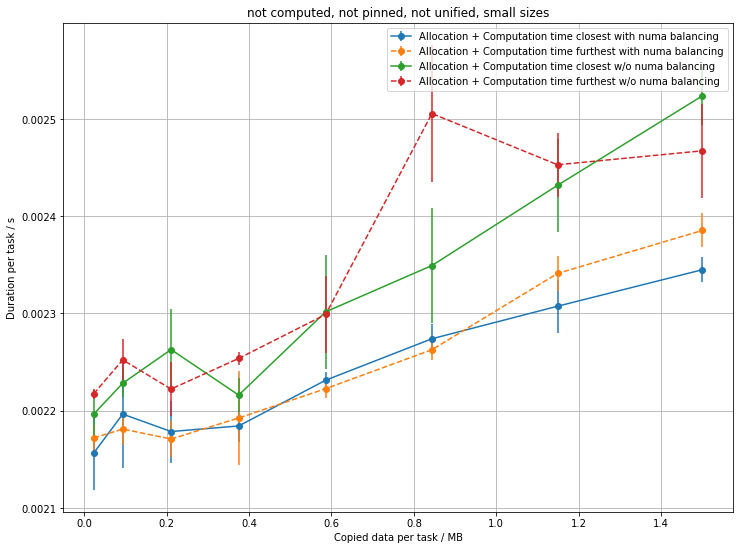

with numa balancing
Min relative difference 24.0 MB, -0.3025651988771181 %
Max relative difference 1536.0 MB, 15.071631570798996 %

w/o numa balancing
Min relative difference 24.0 MB, 3.4522365759819844 %
Max relative difference 1536.0 MB, 14.660856205510525 %



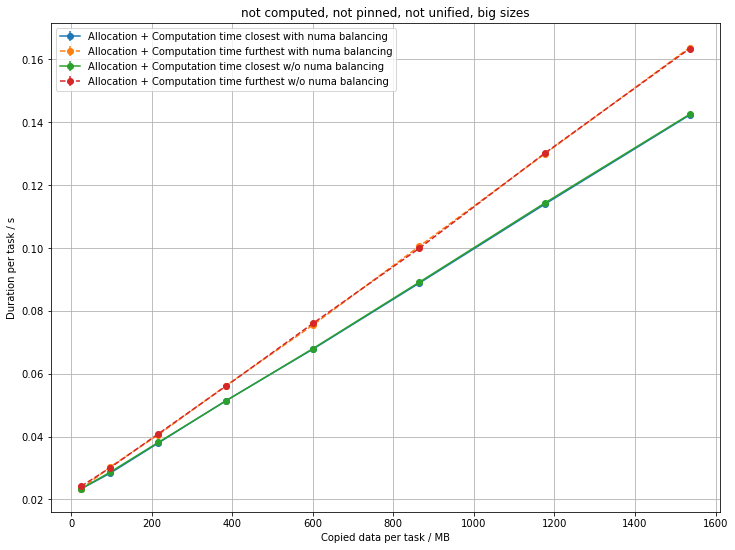

with numa balancing
Min relative difference 0.0234375 MB, -3.2471881427659497 %
Max relative difference 0.5859375 MB, 4.473761126844471 %

w/o numa balancing
Min relative difference 0.0234375 MB, -2.219935379403755 %
Max relative difference 0.5859375 MB, 2.650106439885475 %



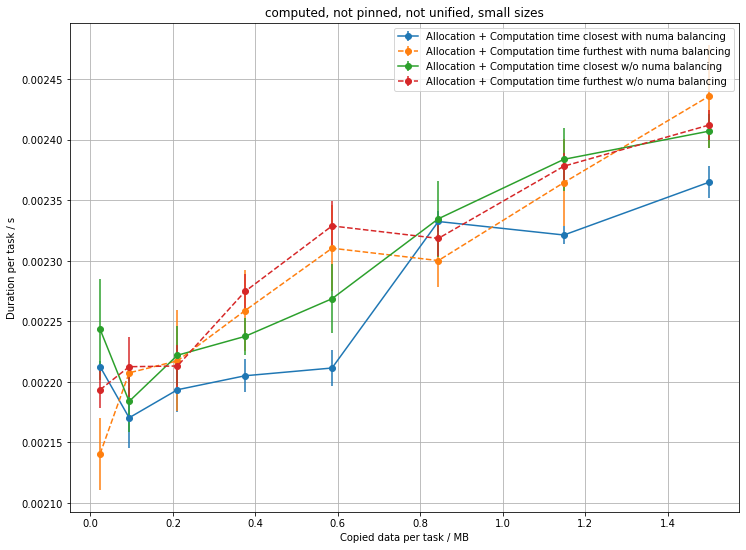

with numa balancing
Min relative difference 864.0 MB, -0.2608077436873295 %
Max relative difference 600.0 MB, 0.5051096167091226 %

w/o numa balancing
Min relative difference 1176.0 MB, -0.3686854856350457 %
Max relative difference 216.0 MB, 0.7954018910908547 %



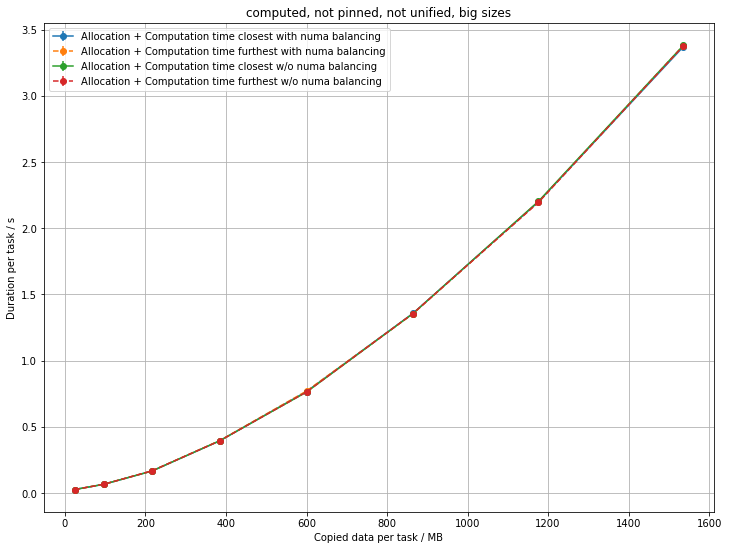

with numa balancing
Min relative difference 0.0234375 MB, -3.4275508917361543 %
Max relative difference 0.84375 MB, 3.0983595778599744 %

w/o numa balancing
Min relative difference 0.0234375 MB, -1.1268996758502081 %
Max relative difference 0.5859375 MB, 4.975925936681434 %



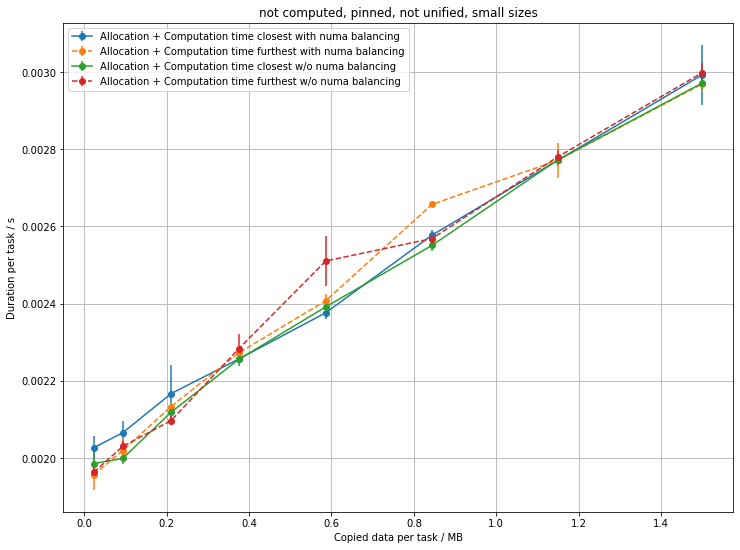

with numa balancing
Min relative difference 96.0 MB, -1.5944185655059988 %
Max relative difference 1536.0 MB, 0.4603409754565277 %

w/o numa balancing
Min relative difference 600.0 MB, -1.3840787683658806 %
Max relative difference 24.0 MB, 2.2821683610897576 %



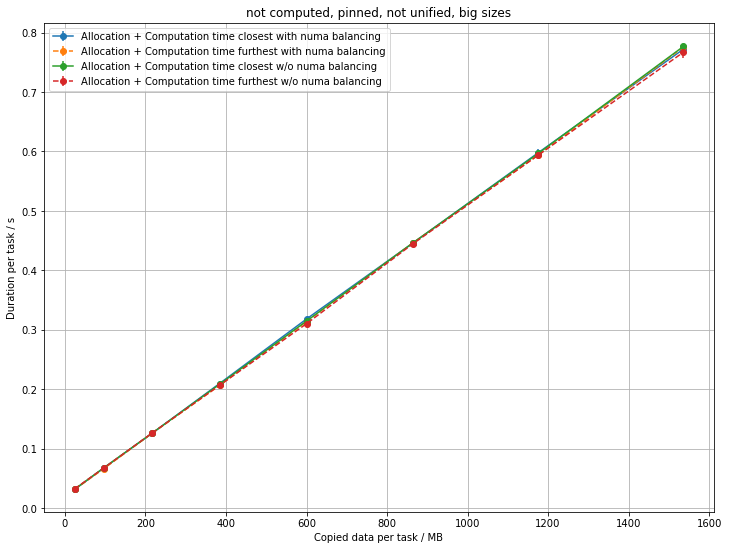

with numa balancing
Min relative difference 0.2109375 MB, -0.7012061482892202 %
Max relative difference 0.0234375 MB, 2.8462888191299247 %

w/o numa balancing
Min relative difference 0.5859375 MB, -1.81966961591571 %
Max relative difference 0.2109375 MB, 2.786350620426349 %



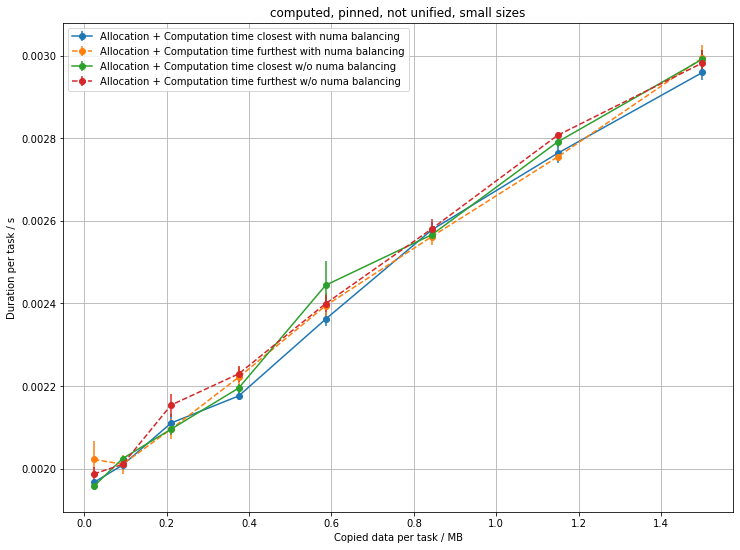

with numa balancing
Min relative difference 24.0 MB, -0.5225326732752311 %
Max relative difference 216.0 MB, 0.34249500163144725 %

w/o numa balancing
Min relative difference 384.0 MB, -0.36127707759404215 %
Max relative difference 24.0 MB, 3.038383035080109 %



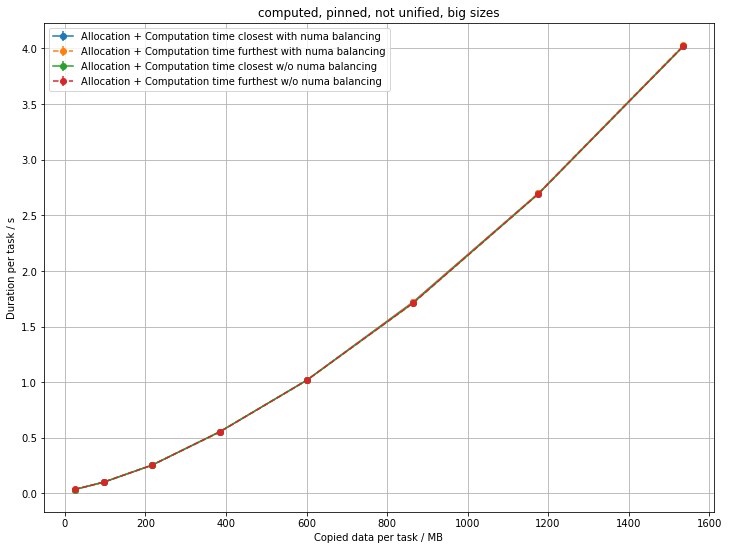

with numa balancing
Min relative difference 0.0234375 MB, -4.562549557348309 %
Max relative difference 0.2109375 MB, 3.000772017340715 %

w/o numa balancing
Min relative difference 0.84375 MB, -4.189800395417496 %
Max relative difference 1.5 MB, 1.1410495847101065 %



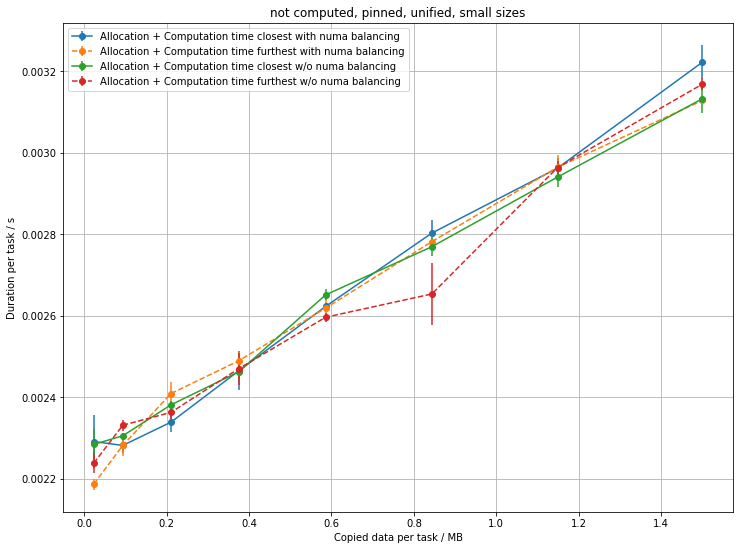

with numa balancing
Min relative difference 1536.0 MB, -1.7923686147238143 %
Max relative difference 864.0 MB, 1.0595488587952249 %

w/o numa balancing
Min relative difference 864.0 MB, -2.240117112356481 %
Max relative difference 24.0 MB, 0.733945559110059 %



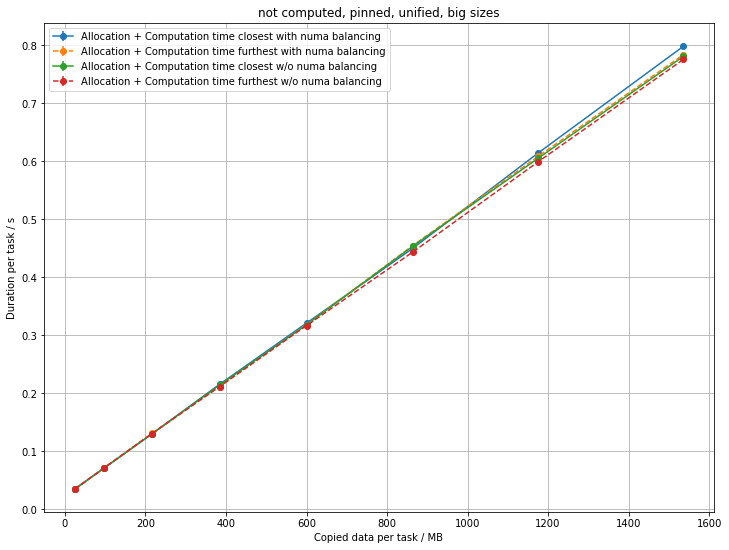

with numa balancing
Min relative difference 1.5 MB, -3.207916363839657 %
Max relative difference 0.2109375 MB, -0.3174588216446845 %

w/o numa balancing
Min relative difference 0.2109375 MB, -5.984839584906717 %
Max relative difference 0.0234375 MB, 2.8757078364343305 %



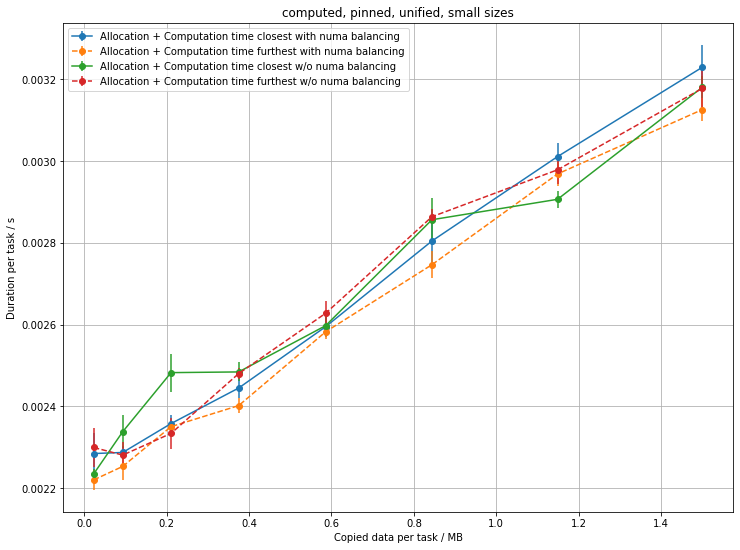

with numa balancing
Min relative difference 864.0 MB, -0.21339139655777123 %
Max relative difference 24.0 MB, 0.9159821235385912 %

w/o numa balancing
Min relative difference 24.0 MB, -1.213621225239581 %
Max relative difference 216.0 MB, 0.6454246060261251 %



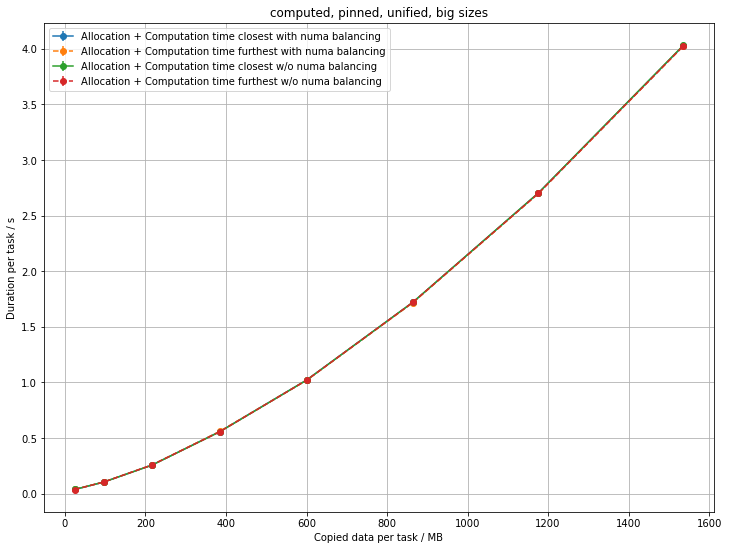

In [4]:
keys = [
    "spread_12_32 120", "spread_12_64 120", "spread_12_96 120", 
    "spread_12_128 120", "spread_12_160 120", "spread_12_192 120",
    "spread_12_224 120", "spread_12_256 120",
    "spread_12_1024 12", "spread_12_2048 12", "spread_12_3072 12",
    "spread_12_4096 12", "spread_12_5120 12", "spread_12_6144 12",
    "spread_12_7168 12", "spread_12_8192 12"
]

def create_title(config):
    c = "computed"
    p = "pinned"
    u = "unified"
    
    a = [c, p, u]
    for i in [0,1,2]:
        if config[i] == "_":
            a[i] = "not " + a[i]
    return ', '.join(a)

def plotup(c):
    #mb_per_thread = ([i*i*8/(1024**2)*10 for i in [32,64,96,128,160,192,224,256]])
    mb_per_thread = ([i*i*8/(1024**2)*3 for i in [1024,2048,3072,4096,5120,6144,7168,8192]])
    
    configs = []
    if "_" + c in data.keys():
        configs += ["_" + c]
    if "b" + c in data.keys():
        configs += ["b" + c]
    
    for config in configs:
        balanced = "w/o numa balancing"
        if config[0] == "_":
            balanced = "with numa balancing"
            
        allocation_best = np.array([data[config][keys[i]]["best"]["allocation"]["average"] for i in range(8,8+len(mb_per_thread))])
        execution_best = np.array([data[config][keys[i]]["best"]["computation"]["average"] for i in range(8,8+len(mb_per_thread))])
        u_allocation_best = np.array([data[config][keys[i]]["best"]["allocation"]["derivation"] for i in range(8,8+len(mb_per_thread))])/np.sqrt(2)
        u_exection_best = np.array([data[config][keys[i]]["best"]["computation"]["derivation"] for i in range(8,8+len(mb_per_thread))])/np.sqrt(2)

        allocation_worst = np.array([data[config][keys[i]]["worst"]["allocation"]["average"] for i in range(8,8+len(mb_per_thread))])
        execution_worst = np.array([data[config][keys[i]]["worst"]["computation"]["average"] for i in range(8,8+len(mb_per_thread))])
        u_allocation_worst = np.array([data[config][keys[i]]["worst"]["allocation"]["derivation"] for i in range(8,8+len(mb_per_thread))])/np.sqrt(2)
        u_exection_worst = np.array([data[config][keys[i]]["worst"]["computation"]["derivation"] for i in range(8,8+len(mb_per_thread))])/np.sqrt(2)

        #plt.plot(mb_per_thread, allocation_best, marker='o', label='Allocation time best')
        #plt.plot(mb_per_thread, allocation_worst, marker='o', linestyle='--', label='Allocation time worst')
        #plt.plot(mb_per_thread, execution_worst, marker='o', linestyle='--', label='Computation time worst')
        #plt.plot(mb_per_thread, execution_best, marker='o', label='Computation time best')
        plt.errorbar(mb_per_thread, (allocation_best + execution_best)/12, yerr=np.sqrt(u_allocation_best**2+u_exection_best**2)/12, marker='o', label='Allocation + Computation time closest ' + balanced)
        plt.errorbar(mb_per_thread, (allocation_worst + execution_worst)/12, yerr=np.sqrt(u_allocation_worst**2+u_exection_worst**2)/12, marker='o', linestyle='--', label='Allocation + Computation time furthest ' + balanced)
    
        m,i= max(list(zip(((allocation_worst + execution_worst) - (allocation_best + execution_best))/(allocation_best + execution_best),range(len(execution_worst)))))
        mi, i2 = min(list(zip(((allocation_worst + execution_worst) - (allocation_best + execution_best))/(allocation_best + execution_best),range(len(execution_worst)))))
        #a = (allocation_best + execution_best)[i]
        #b = (allocation_worst + execution_worst)[i]
        #print(m,i)

        print(balanced)
        print('Min relative difference', mb_per_thread[i2], 'MB,', mi*100,"%")
        print('Max relative difference', mb_per_thread[i], 'MB,', m*100,"%")
        print()
    
    plt.rcParams["figure.figsize"] = (12,9)
    plt.xlabel("Copied data per task / MB")
    plt.ylabel("Duration per task / s")
    plt.title(create_title(c) + ", big sizes")
    plt.grid()
    plt.legend()
    plt.show()
    
    
def plotdown(c):
    mb_per_thread = ([i*i*8/(1024**2)*3 for i in [32,64,96,128,160,192,224,256]])
    #mb_per_thread = ([i*i*8/(1024**2)*12 for i in [1024,2048,3072,4096,5120,6144,7168,8192]])
    configs = []
    if "_" + c in data.keys():
        configs += ["_" + c]
    if "b" + c in data.keys():
        configs += ["b" + c]
        
    for config in configs:
        balanced = "w/o numa balancing"
        if config[0] == "_":
            balanced = "with numa balancing"
            
        allocation_best = np.array([data[config][keys[i]]["best"]["allocation"]["average"] for i in range(len(mb_per_thread))])
        execution_best = np.array([data[config][keys[i]]["best"]["computation"]["average"] for i in range(len(mb_per_thread))])
        u_allocation_best = np.array([data[config][keys[i]]["best"]["allocation"]["derivation"] for i in range(len(mb_per_thread))])/np.sqrt(2)
        u_exection_best = np.array([data[config][keys[i]]["best"]["computation"]["derivation"] for i in range(len(mb_per_thread))])/np.sqrt(2)

        allocation_worst = np.array([data[config][keys[i]]["worst"]["allocation"]["average"] for i in range(len(mb_per_thread))])
        execution_worst = np.array([data[config][keys[i]]["worst"]["computation"]["average"] for i in range(len(mb_per_thread))])
        u_allocation_worst = np.array([data[config][keys[i]]["worst"]["allocation"]["derivation"] for i in range(len(mb_per_thread))])/np.sqrt(2)
        u_exection_worst = np.array([data[config][keys[i]]["worst"]["computation"]["derivation"] for i in range(len(mb_per_thread))])/np.sqrt(2)

        #plt.plot(mb_per_thread, allocation_best, marker='o', label='Allocation time best')
        #plt.plot(mb_per_thread, allocation_worst, marker='o', linestyle='--', label='Allocation time worst')
        #plt.plot(mb_per_thread, execution_worst, marker='o', linestyle='--', label='Computation time worst')
        #plt.plot(mb_per_thread, execution_best, marker='o', label='Computation time best')
        plt.errorbar(mb_per_thread, (allocation_best + execution_best)/120, yerr=np.sqrt(u_allocation_best**2+u_exection_best**2)/120, marker='o', label='Allocation + Computation time closest ' + balanced)
        plt.errorbar(mb_per_thread, (allocation_worst + execution_worst)/120, yerr=np.sqrt(u_allocation_worst**2+u_exection_worst**2)/120, marker='o', linestyle='--', label='Allocation + Computation time furthest ' + balanced)
    
        m,i= max(list(zip(((allocation_worst + execution_worst) - (allocation_best + execution_best))/(allocation_best + execution_best),range(len(execution_worst)))))
        mi, i2 = min(list(zip(((allocation_worst + execution_worst) - (allocation_best + execution_best))/(allocation_best + execution_best),range(len(execution_worst)))))
        #a = (allocation_best + execution_best)[i]
        #b = (allocation_worst + execution_worst)[i]
        #print(m,i)

        print(balanced)
        print('Min relative difference', mb_per_thread[i2], 'MB,', mi*100,"%")
        print('Max relative difference', mb_per_thread[i], 'MB,', m*100,"%")
        print()
    
    plt.rcParams["figure.figsize"] = (12,9)
    plt.xlabel("Copied data per task / MB")
    plt.ylabel("Duration per task / s")
    plt.title(create_title(c) + ", small sizes")
    plt.grid()
    plt.legend()
    plt.show()
print("GLOBAL SETTINGS: OMP_NUM_THREADS=12, OMP_PLACES=cores, OMP_PROC_BIND=spread,\nREPEAT=3, SMALL_TASKS_NUM=120, BIG_TASK_NUM=12")
print("\n")
configs = ["___", "c__", "_p_", "cp_", "_pu", "cpu"]
for k in configs:
    plotdown(k)
    plotup(k)